### Healthcare Diabetes Prediction project

#### Problem Statement

1. NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
2. The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
3. Build a model to accurately predict whether the patients in the dataset have diabetes or not.

#### Importing the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings('ignore')

#### Reading the data
Since the target variable is in binary categorical value of 1 and 0 representing as Diabetic(1) and Non-Diabetic(0), we have to deal this problem as the Classification model of Supervised Learning. By training the model with the provided data through various Classification models to predict the future data for Diabetic and Non-Diabetic.

In [2]:
df = pd.read_csv('health care diabetes.csv')

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Minimum value for Glucose, BloodPressure, SkinThickness, Insulin, BMI is 0, which does not make any any sense. Therefore, replacing all the zeros in these columns by nan values and treating them as missing.

In [7]:
df['Glucose'] = df['Glucose'].replace({0: np.nan})
df['BloodPressure'] = df['BloodPressure'].replace({0: np.nan})
df['SkinThickness'] = df['SkinThickness'].replace({0: np.nan})
df['BMI'] = df['BMI'].replace({0: np.nan})
df['Insulin'] = df['Insulin'].replace({0: np.nan})

### EDA

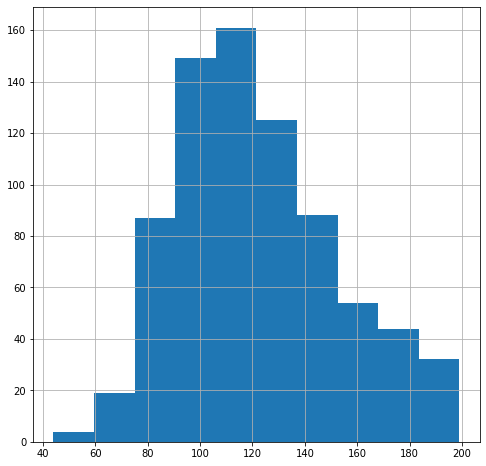

In [8]:
plt.figure(figsize=(8,8))
df['Glucose'].hist()

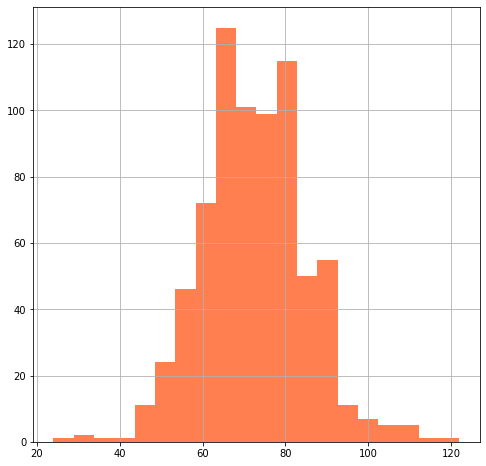

In [9]:
plt.figure(figsize=(8,8))
df['BloodPressure'].hist(bins = 20, color = 'coral')

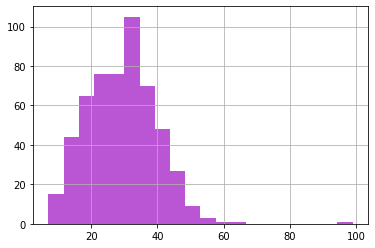

In [10]:
df['SkinThickness'].hist(bins=20, color='mediumorchid')

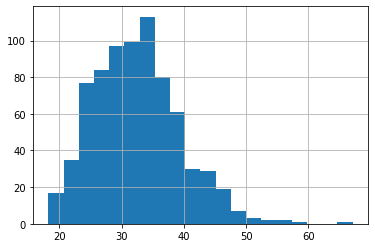

In [11]:
df['BMI'].hist(bins=20)

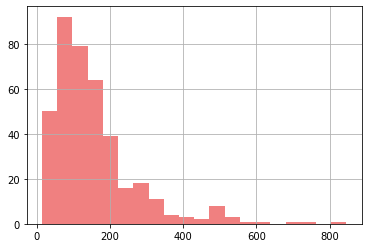

In [12]:
df['Insulin'].hist(bins=20, color='lightcoral')

#### Handling missing data by MICE

                          Total   Percent
Insulin                     374  0.486979
SkinThickness               227  0.295573
BloodPressure                35  0.045573
BMI                          11  0.014323
Glucose                       5  0.006510
Outcome                       0  0.000000
Age                           0  0.000000
DiabetesPedigreeFunction      0  0.000000
Pregnancies                   0  0.000000
(768, 9)


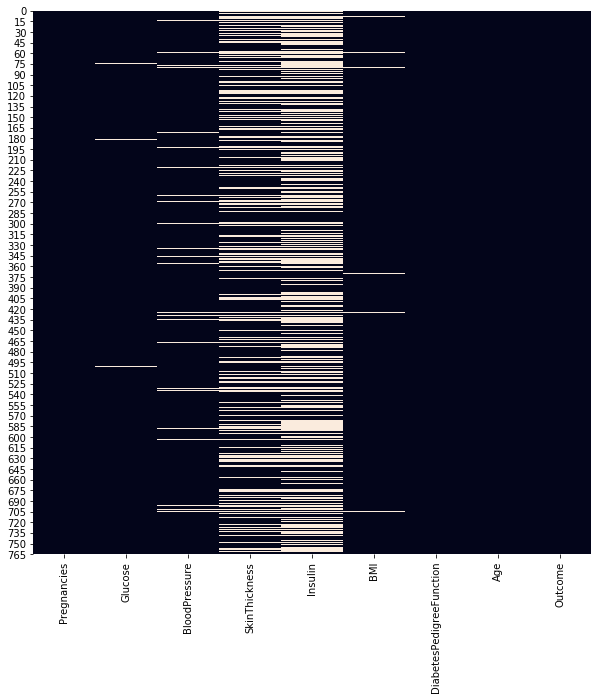

In [13]:
def missing_value(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys = ['Total', 'Percent'])
    return missing_data

print(missing_value(df))
plt.figure(figsize= [10,10])
sns.heatmap(df.isnull(), cbar=False)
print(df.shape)


Nearly, half of the Insulin data is missing, followed by SkinThickness, BloodPressure, BMI and Glucose. I'll use MICE technique to fill the missing data.

In [14]:
from statsmodels.imputation import mice 

df= mice.MICEData(df).data

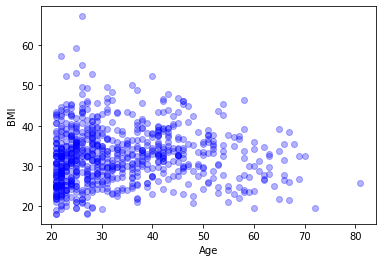

In [15]:
sns.regplot('Age', 'BMI', fit_reg=False, data=df, scatter_kws={'color':'blue', 'alpha':0.3})

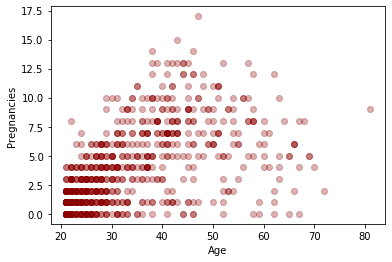

In [16]:
sns.regplot('Age', 'Pregnancies', fit_reg=False, data=df, scatter_kws={'color':'darkred', 'alpha':0.3})

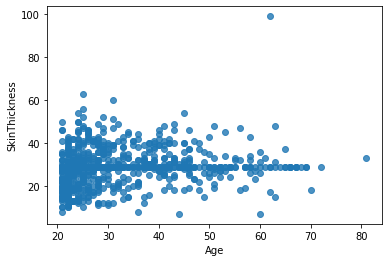

In [17]:
sns.regplot('Age', 'SkinThickness', fit_reg=False, data=df)

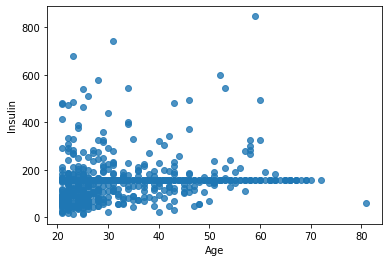

In [18]:
sns.regplot('Age', 'Insulin', fit_reg=False, data=df)

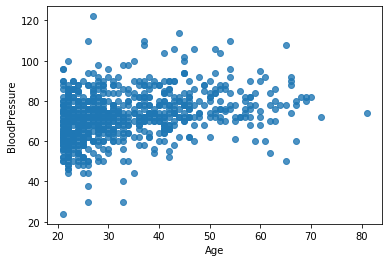

In [19]:
sns.regplot('Age', 'BloodPressure', fit_reg=False, data=df)

0    500
1    268
Name: Outcome, dtype: int64


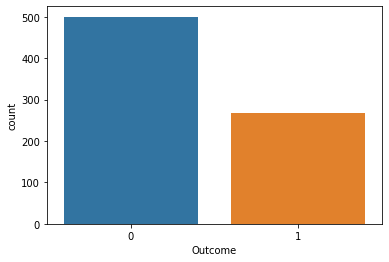

In [20]:
sns.countplot(df['Outcome'])
print(df['Outcome'].value_counts())

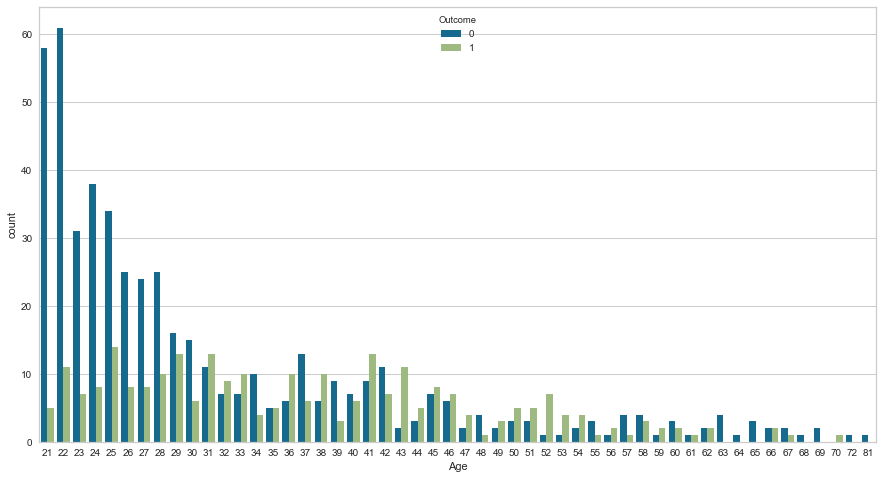

In [22]:
fig = plt.figure(figsize=(15,8))

sns.countplot(df['Age'], hue=df['Outcome'])

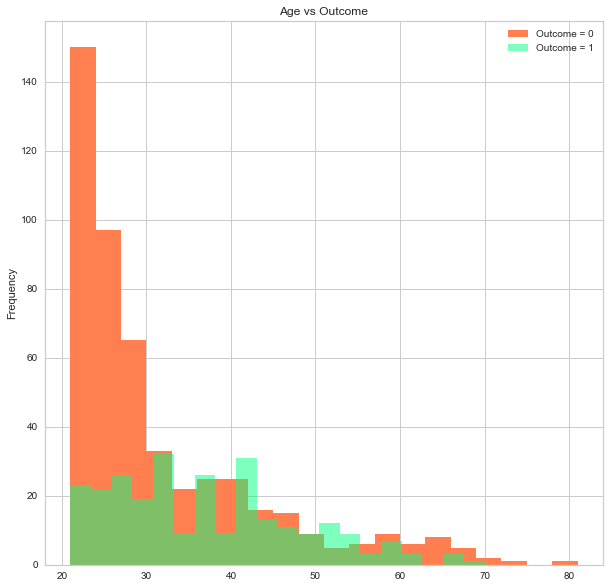

In [23]:
plt.figure(figsize=(10,10))
df['Age'][df['Outcome']==0].plot.hist(bins=20, alpha=1, label='Outcome = 0', color='coral')
df['Age'][df['Outcome']==1].plot.hist(bins=20, alpha=0.5, label='Outcome = 1', color='springgreen')
plt.title('Age vs Outcome')
plt.legend(loc='best')

#### Checking for Correlation

In [24]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492935
BMI                         0.311893
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.214519
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

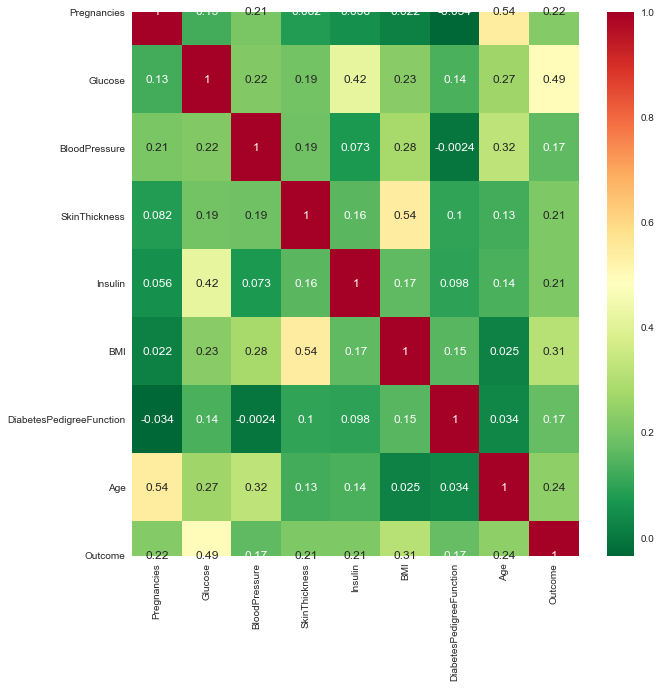

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn_r')
plt.show()

Their is no high collinearity among the features. therefore, it shouldn't be causing any problem in predictions.

#### Splitting the data

In [26]:
x = df.drop('Outcome', axis=1)
y = df.Outcome
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=12)

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#### Building pipeline and model

#### Logistic Regression

In [27]:
lr = LogisticRegression()

lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [28]:
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.7835497835497836
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       147
           1       0.77      0.57      0.66        84

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [29]:
print(confusion_matrix(ytest,ypred))

[[133  14]
 [ 36  48]]


#### ROC_AUC curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.848


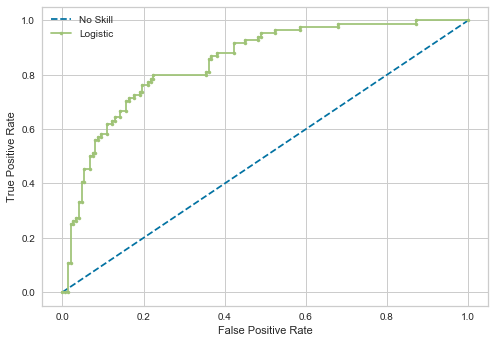

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(ytest))]

# predict probabilities
lr_probs = lr.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

0.7380952380952381


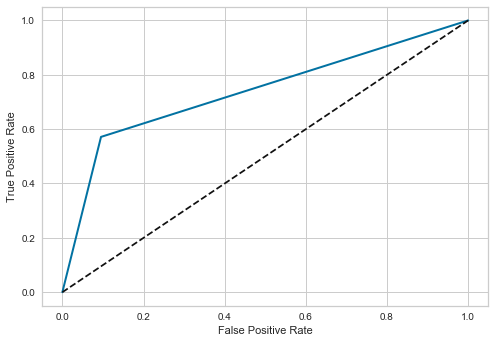

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(ytest,ypred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
print(roc_auc_score(ytest,ypred))

#### SVC

In [32]:
svc = SVC()

svc.fit(xtrain,ytrain)
svc_pred = svc.predict(xtest)

In [33]:
print(accuracy_score(ytest,svc_pred))
print(classification_report(ytest,svc_pred))

0.7835497835497836
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       147
           1       0.77      0.58      0.66        84

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [34]:
print(confusion_matrix(ytest,svc_pred))

[[132  15]
 [ 35  49]]


#### Linear SVC

In [35]:
linear_svc = LinearSVC()

linear_svc.fit(xtrain,ytrain)
linear_pred = linear_svc.predict(xtest)

In [36]:
print(accuracy_score(ytest,linear_pred))
print(classification_report(ytest,linear_pred))

0.7878787878787878
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       147
           1       0.78      0.58      0.67        84

    accuracy                           0.79       231
   macro avg       0.78      0.74      0.76       231
weighted avg       0.79      0.79      0.78       231



In [37]:
print(confusion_matrix(ytest,linear_pred))

[[133  14]
 [ 35  49]]


#### Regularized linear model with SGD

In [38]:
sgd = SGDClassifier()

sgd.fit(xtrain,ytrain)
sgd_pred = sgd.predict(xtest)

In [39]:
print(accuracy_score(ytest,sgd_pred))
print(classification_report(ytest,sgd_pred))
print(confusion_matrix(ytest,sgd_pred))

0.6883116883116883
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       147
           1       0.59      0.46      0.52        84

    accuracy                           0.69       231
   macro avg       0.66      0.64      0.64       231
weighted avg       0.68      0.69      0.68       231

[[120  27]
 [ 45  39]]


#### Naive Bayes

In [40]:
nb = GaussianNB()

nb.fit(xtrain,ytrain)
nb_pred = nb.predict(xtest)

In [41]:
print(accuracy_score(ytest,nb_pred))
print(classification_report(ytest,nb_pred))
print(confusion_matrix(ytest,nb_pred))

0.7619047619047619
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       147
           1       0.70      0.60      0.65        84

    accuracy                           0.76       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

[[126  21]
 [ 34  50]]


#### Perceptron

In [42]:
perceptron = Perceptron()
perceptron.fit(xtrain,ytrain)
p_pred = perceptron.predict(xtest)

In [43]:
print(accuracy_score(ytest,p_pred))
print(classification_report(ytest,p_pred))
print(confusion_matrix(ytest,p_pred))

0.7402597402597403
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       147
           1       0.63      0.70      0.66        84

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.74      0.74       231

[[112  35]
 [ 25  59]]


#### Decision Tree

In [44]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dt_pred = dt.predict(xtest)

In [45]:
print(accuracy_score(ytest,dt_pred))
print(classification_report(ytest,dt_pred))
print(confusion_matrix(ytest,dt_pred))

0.7012987012987013
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       147
           1       0.60      0.55      0.57        84

    accuracy                           0.70       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231

[[116  31]
 [ 38  46]]


### Ensemble methods

#### Random Forest

In [46]:
rf = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(rf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Mean Accuracy: 0.758 (0.042)


In [47]:
rf.fit(xtrain,ytrain)
rf_pred = rf.predict(xtest)
print(accuracy_score(ytest,rf_pred))
print(confusion_matrix(ytest,rf_pred))

0.7792207792207793
[[127  20]
 [ 31  53]]


In [48]:
from sklearn.model_selection import cross_val_predict
rfc = RandomForestClassifier()
y_prob = cross_val_predict(rfc, xtrain, ytrain, cv=3, method = 'predict_proba')


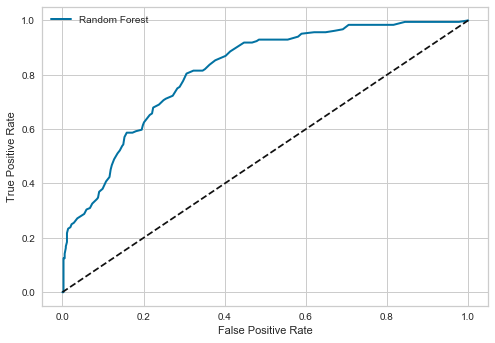

In [49]:
# roc-auc for Random Forest
y_score = y_prob[:,1]
fpr, tpr, threshold = roc_curve(ytrain,y_score)
plot_roc_curve(fpr, tpr, 'Random Forest')
plt.legend(loc='best')
plt.show()

#### AdaBoost

In [50]:
abc = AdaBoostClassifier()
abc.fit(xtrain,ytrain)
abc_pred = rf.predict(xtest)
print(accuracy_score(ytest,abc_pred))
print(confusion_matrix(ytest,abc_pred))

0.7792207792207793
[[127  20]
 [ 31  53]]


#### XGBoost

In [51]:
xgb = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(xgb, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Mean Accuracy: 0.738 (0.053)


#### Gradient Boosting

In [52]:
gbm = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(gbm, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Mean Accuracy: 0.759 (0.045)


In [53]:
gbm = GradientBoostingClassifier()
gbm.fit(xtrain,ytrain)
gbm_pred = gbm.predict(xtest)

print(accuracy_score(ytest,gbm_pred))
print(classification_report(ytest,gbm_pred))
print(confusion_matrix(ytest,gbm_pred))

0.7489177489177489
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       147
           1       0.68      0.60      0.63        84

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.74      0.75      0.75       231

[[123  24]
 [ 34  50]]


#### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
knn_pred = knn.predict(xtest)

In [55]:
print(accuracy_score(ytest,knn_pred))
print(classification_report(ytest,knn_pred))
print(confusion_matrix(ytest,knn_pred))

0.7619047619047619
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       147
           1       0.70      0.61      0.65        84

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

[[125  22]
 [ 33  51]]


#### Hypertuning KNN

In [56]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain, ytrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.756534 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.681458 (0.054700) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.681458 (0.054700) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.719928 (0.051895) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.719928 (0.051895) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.721803 (0.058887) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.723049 (0.058237) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.743559 (0.053014) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.743559 (0.054542) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.742989 (0.046666) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.744223 (0.049739) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.748008 

In [57]:
KNN = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights = 'distance')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(KNN, xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Mean Accuracy: 0.757 (0.055)


0.7287414965986395


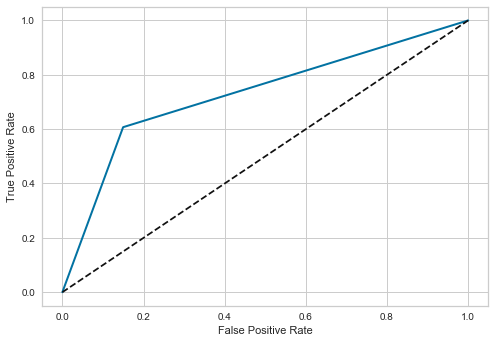

In [58]:
fpr, tpr, thresholds = roc_curve(ytest,knn_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
print(roc_auc_score(ytest,knn_pred))

#### ROC-AUC curve by taking the probability value

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.848


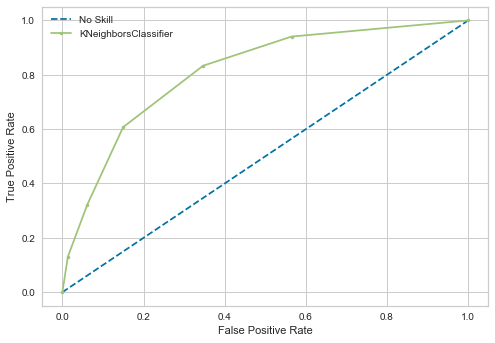

In [59]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(ytest))]

# predict probabilities
knn_probs = knn.predict_proba(xtest)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
knn_auc = roc_auc_score(ytest, knn_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(ytest, knn_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighborsClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

### Visualising the Data

#### Rank Features

which feature is most relevant to the outcome is shown by the help of Rank1D

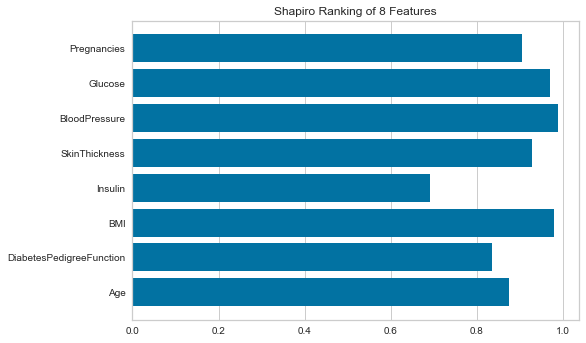

In [60]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(x, y)           
visualizer.transform(x)        
visualizer.show()    

By this we can see that BMI and Blood Pressure is most important feature in prediction followed by Glucose and Age.

### Visualising the Result

#### Confusion Matrix

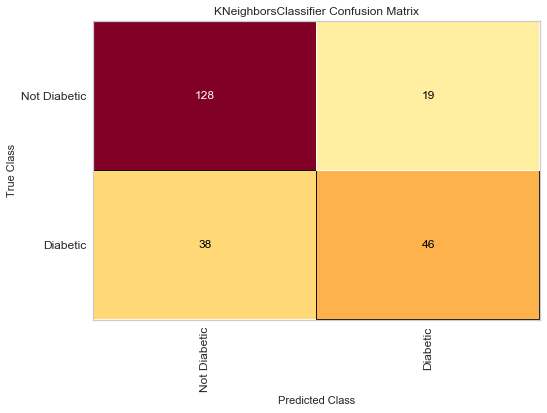

In [61]:
from yellowbrick.classifier import ConfusionMatrix

classes = ['Not Diabetic','Diabetic']
cm = ConfusionMatrix(KNN, classes=classes)
cm.fit(xtrain, ytrain)
cm.score(xtest, ytest)
cm.show()

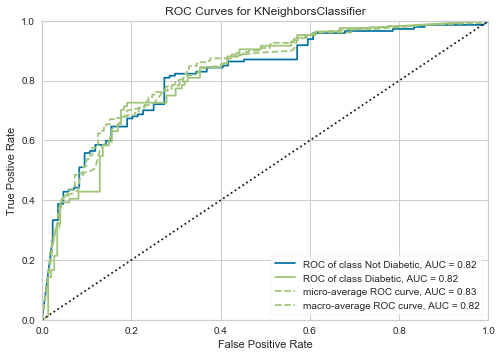

In [62]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(KNN, classes=classes)
visualizer.fit(xtrain, ytrain)        
visualizer.score(xtest, ytest)        
visualizer.show()      

#### Learning Curve

A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:
1. How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).
2. If the estimator is more sensitive to error due to variance vs. error due to bias.

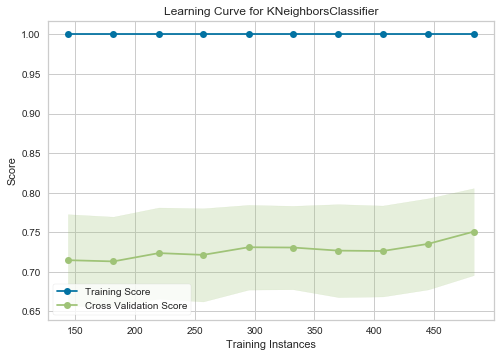

In [63]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
visualizer = LearningCurve(KNN , cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)

visualizer.fit(xtrain, ytrain)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

The curves are plotted with the mean scores, however variability during cross-validation is shown with the shaded areas that represent a standard deviation above and below the mean for all cross-validations. If the model suffers from error due to bias, then there will likely be more variability around the training score curve. If the model suffers from error due to variance, then there will be more variability around the cross validated score.

#### Validation curve
Model validation is used to determine how effective an estimator is on data that it has been trained on as well as how generalizable it is to new input. To measure a model’s performance we first split the dataset into training and test splits, fitting the model on the training data and scoring it on the reserved test data. The shaded portion across training line and cross validation line tells the biasness and variation of the model. If the shading is much larger across training line then the model is under biasness and if the shading is much across cross validation line then the model is overfitted and shows more variation. To deal with overfitting we have to use cross validation KFold technique to repeatedly train the model, this will reduce the overfitting. Below I have shown how just simply fitting the KNN model will overfit the data and then by using cross validation will help to deal with overfitting. 

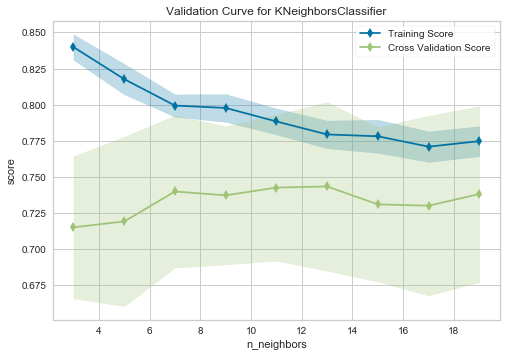

In [65]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_range = np.arange(3, 20, 2)

val_curve = ValidationCurve(knn, param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4)

# Using the same game dataset as in the SVC example
val_curve.fit(xtrain, ytrain)
val_curve.show()

This shows overfitting of model.

#### using Repeated Stratified KFold method

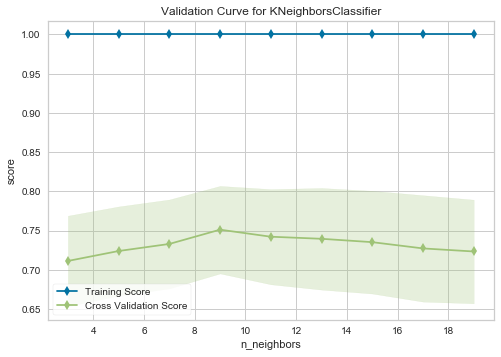

In [64]:
from yellowbrick.model_selection import ValidationCurve
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_range = np.arange(3, 20, 2)

val_curve = ValidationCurve(KNN, param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4)

# Using the same game dataset as in the SVC example
val_curve.fit(xtrain, ytrain)
val_curve.show()

### Viewing the Tableau Dashboard

#### Dashboard 1
1. showing Pie Chart for Diabetic and Non-Diabetic population in percentage.
2. Frequency Chart between outcome as diabetic and Non-diabetic and Age.
3. Scatter Plot to show distribution of BMI and Pregnancies at different Age.In plot between Age and Pregnancies, colour representing the varying Glucose level. And the size of circles is incresing as with the count of increasing BloodPressure.


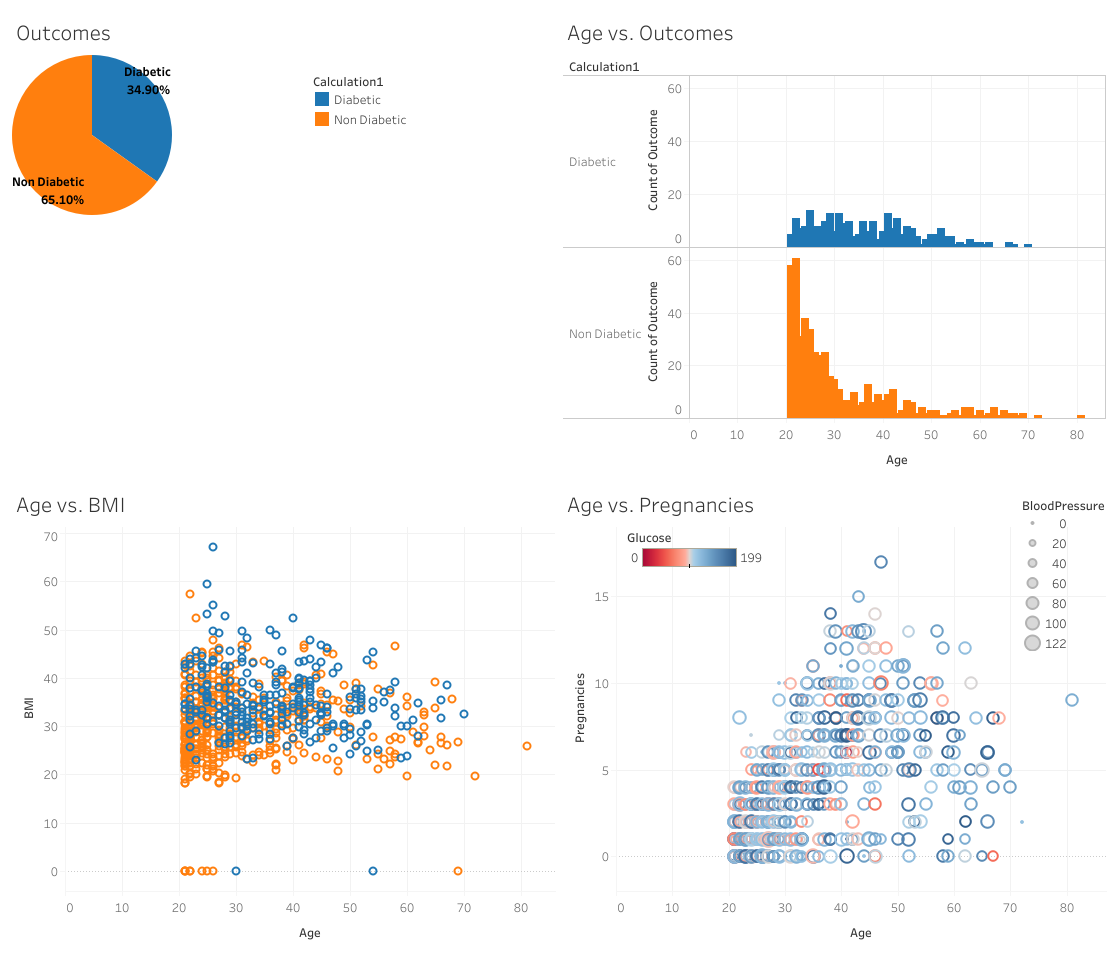

In [4]:
from IPython.display import Image, display
display(Image(filename='Dashboard 1.png'))

#### Dashoard 2
1. Bubble Chart average BMI of patient at different age group. Continuous varying in colour representing the increase in Glucose level at differenr Age group.
2. Bubble Chart showing Variation of SkinThickness at different age group.
3. Bubble Chart showing Sum of Pregnancies at different age group with varying size representing the increase in BloodPressure.

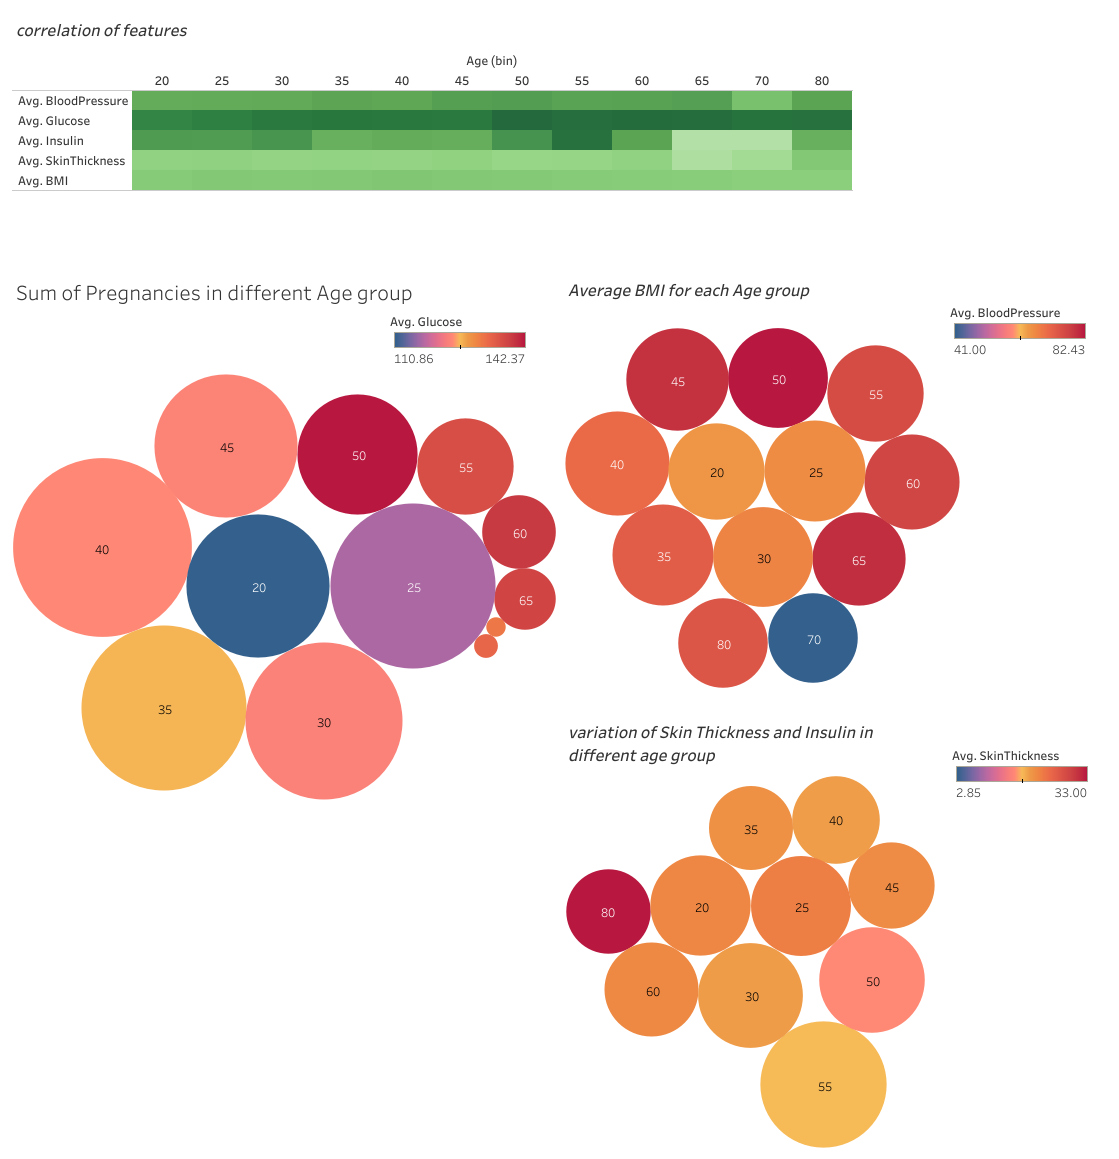

In [5]:
display(Image(filename = 'Dashboard 2.png'))

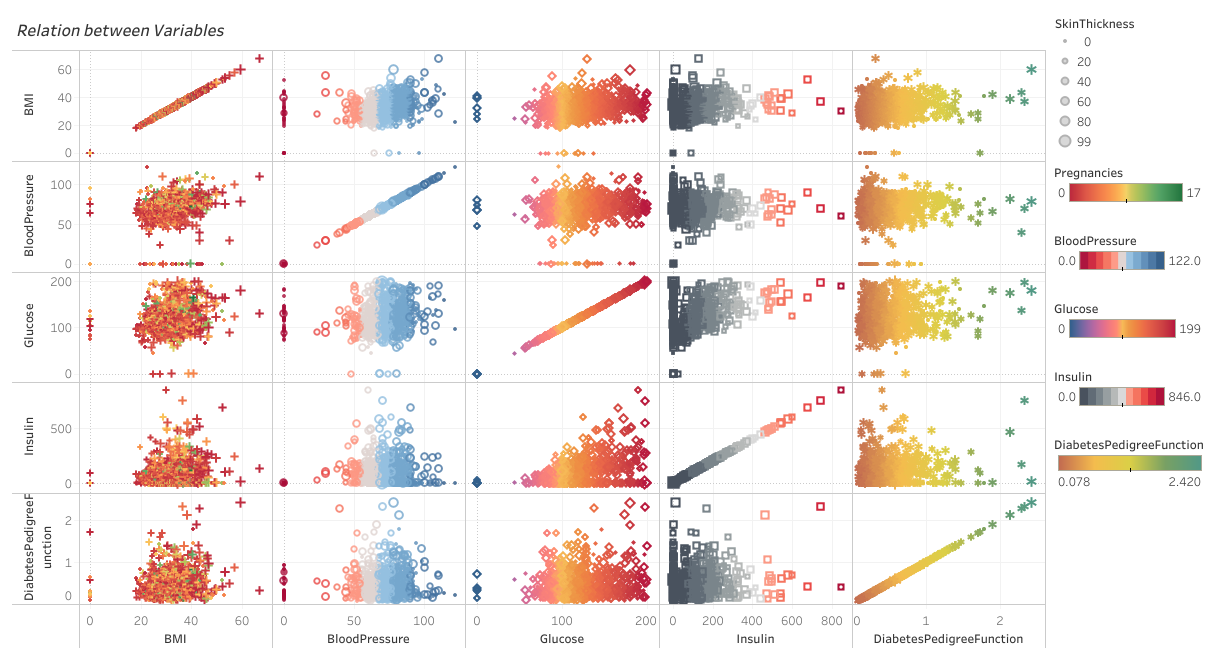

In [6]:
display(Image(filename = 'Dashboard 3.png'))